<a href="https://colab.research.google.com/github/Sanskruti-Shimple/Temperature-Sensor-Failure-Detection-and-Diagnosis-Based-on-the-ARIMA-Model/blob/main/ediproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def parser(x):
    return datetime.strptime(x,'%H:%M:%S')

pro = pd.read_csv('/content/Ther_healthy.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 09:21:06,18.00
1900-01-01 09:21:08,18.25
1900-01-01 09:21:10,18.50
1900-01-01 09:21:12,18.25
1900-01-01 09:21:14,18.50


Text(0, 0.5, 'Temperature')

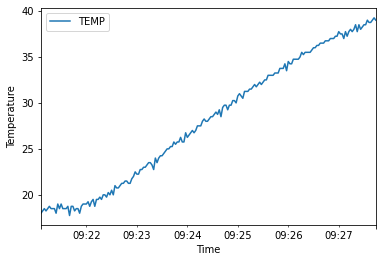

In [ ]:
pro.plot()
plt.xlabel("Time")
plt.ylabel("Temperature")
# plt.plot(x1, y1, label = "line 1")
# plt.plot(x2, y2, label = "line 2")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'ACF')

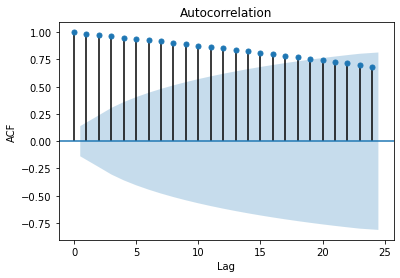

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pro)
plt.xlabel("Lag")
plt.ylabel("ACF")


##Converting series to stationary

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 09:21:06,18.00
1900-01-01 09:21:08,18.25
1900-01-01 09:21:10,18.50
1900-01-01 09:21:12,18.25
1900-01-01 09:21:14,18.50


In [ ]:
pro.shift(1)

,TEMP
TIME,
1900-01-01 09:21:06,NaN
1900-01-01 09:21:08,18.00
1900-01-01 09:21:10,18.25
1900-01-01 09:21:12,18.50
1900-01-01 09:21:14,18.25
...,...
1900-01-01 09:27:36,39.00
1900-01-01 09:27:38,38.75
1900-01-01 09:27:40,38.75


In [ ]:
pro_diff = pro.diff(periods=1)
pro_diff = pro_diff[1:]
pro_diff.head()

,TEMP
TIME,
1900-01-01 09:21:08,0.25
1900-01-01 09:21:10,0.25
1900-01-01 09:21:12,-0.25
1900-01-01 09:21:14,0.25
1900-01-01 09:21:16,0.25


Text(0, 0.5, 'ACF')

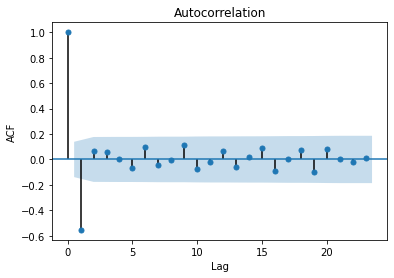

In [ ]:
plot_acf(pro_diff)
plt.xlabel("Lag")
plt.ylabel("ACF")

Text(0, 0.5, 'temperature')

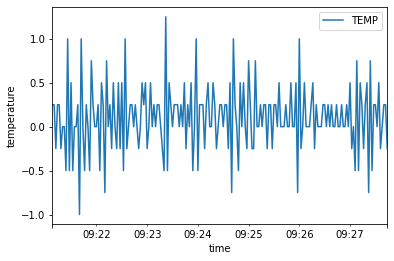

In [ ]:
pro_diff.plot()
plt.xlabel("time")
plt.ylabel("temperature")

In [ ]:
X = pro.values
train = X[0:149] # 149 data as train data
test = X[150:]  # 50 data as test data
predictions = []
print(train.size)
print(test.size)

149
50


##Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=149,end=200)

##ARIMA model

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4, 2, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) #lesser the aic values better is the model

67.78152855462713


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

array([34.55487326, 34.46060991, 34.82088603, 34.81153945, 34.91856515,
       35.18408074, 35.19910886, 35.32925741, 35.57843989, 35.58494723,
       35.75346828, 35.97210852, 35.98514874, 36.18160013, 36.37061109,
       36.39722095, 36.61381471, 36.77476109, 36.82077538, 37.04943342,
       37.18585024, 37.25492908, 37.48826305, 37.60490404, 37.69873538,
       37.9303831 , 38.03272986, 38.15122033, 38.37611553, 38.46988807,
       38.61145746, 38.82596158, 38.91669534, 39.07862196, 39.28053955,
       39.3732423 , 39.55202988, 39.74052428, 39.83942386, 40.03116152,
       40.20659262, 40.31497776, 40.51567002, 40.67937754, 40.79952748,
       41.00537692, 41.15943257, 41.29262603, 41.50025703, 41.64720732])

Text(0, 0.5, 'y2')

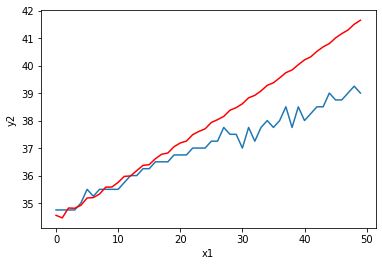

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.xlabel("x1")
plt.ylabel("y2")
# plt.plot(X, test, color='g', label='sin')
# plt.plot(X, predictions, color='r', label='cos')

In [ ]:
mean_squared_error(test,predictions)

1.5572458774000242

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 920.097561328463
(0, 0, 1) 739.6813138132809
(0, 0, 2) 599.0618054567929
(0, 0, 3) 525.0609643763871
(0, 1, 0) 143.75308927219388
(0, 1, 1) 80.88017168575698
(0, 2, 0) 308.9152493797791
(0, 2, 1) 150.16318100330244
(1, 0, 0) 164.03427765151264
(1, 1, 0) 94.50364273559381
(1, 1, 1) 77.3686010335324
(1, 1, 2) 71.71605988756198
(1, 1, 3) 69.05279105004087
(1, 1, 4) 71.0359171606371
(1, 2, 0) 215.3244614656571
(1, 2, 3) 72.33513952188224
(1, 2, 4) 74.2709587207413
(2, 0, 0) 207.9392240663664
(2, 1, 0) 77.51906708271054
(2, 1, 1) 76.62044712583338
(2, 1, 2) 69.21764590055398
(2, 1, 3) 73.01214353207911
(2, 1, 4) 70.92945853079806
(2, 2, 0) 165.3914988903516
(2, 2, 3) 74.48299974892723
(2, 2, 4) 70.67841964327545
(3, 0, 0) 146.5881892317513
(3, 1, 0) 75.58580254003743
(3, 1, 1) 77.25390549523712
(3, 1, 2) 79.23965229677901
(3, 1, 3) 73.21867559280275
(3, 1, 4) 69.5273662097614
(3, 2, 0) 129.5395728862601
(3, 2, 1) 77.12225770063571
(3, 2, 2) 79.07390255568532
(3, 2, 4) 66.620066927

In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

array([34.55487326, 34.46060991, 34.82088603, 34.81153945, 34.91856515,
       35.18408074, 35.19910886, 35.32925741, 35.57843989, 35.58494723,
       35.75346828, 35.97210852, 35.98514874, 36.18160013, 36.37061109,
       36.39722095, 36.61381471, 36.77476109, 36.82077538, 37.04943342,
       37.18585024, 37.25492908, 37.48826305, 37.60490404, 37.69873538,
       37.9303831 , 38.03272986, 38.15122033, 38.37611553, 38.46988807,
       38.61145746, 38.82596158, 38.91669534, 39.07862196, 39.28053955,
       39.3732423 , 39.55202988, 39.74052428, 39.83942386, 40.03116152,
       40.20659262, 40.31497776, 40.51567002, 40.67937754, 40.79952748,
       41.00537692, 41.15943257, 41.29262603, 41.50025703, 41.64720732])

In [ ]:
 df = pd.DataFrame(predictions)  #to arrange data like excel sheet
 df.columns = ["TEMP"]
 df

,TEMP
0,34.554873
1,34.460610
2,34.820886
3,34.811539
4,34.918565
5,35.184081
6,35.199109
7,35.329257
8,35.578440
9,35.584947


In [ ]:
df.to_csv('prediction.csv') 

In [ ]:
prediction = pd.read_csv('/content/prediction.csv')
unhealthy=pd.read_csv('/content/Ther_Faulty.csv')
print(prediction)
print(unhealthy)

    Unnamed: 0       TEMP
0            0  34.554873
1            1  34.460610
2            2  34.820886
3            3  34.811539
4            4  34.918565
5            5  35.184081
6            6  35.199109
7            7  35.329257
8            8  35.578440
9            9  35.584947
10          10  35.753468
11          11  35.972109
12          12  35.985149
13          13  36.181600
14          14  36.370611
15          15  36.397221
16          16  36.613815
17          17  36.774761
18          18  36.820775
19          19  37.049433
20          20  37.185850
21          21  37.254929
22          22  37.488263
23          23  37.604904
24          24  37.698735
25          25  37.930383
26          26  38.032730
27          27  38.151220
28          28  38.376116
29          29  38.469888
30          30  38.611457
31          31  38.825962
32          32  38.916695
33          33  39.078622
34          34  39.280540
35          35  39.373242
36          36  39.552030
37          

In [ ]:
i=1
j=0
k=0
z=unhealthy['INDEX'][unhealthy.index[-1]]

while (i <z):
    a= ((prediction['TEMP'][i]-unhealthy['TEMP'][i]))
    if (a>3):
        j=j+1
        if(j>=2):
            print("wire is loose ,error occured",end=" ")
            print(j,end=" ")
            print("times")
            
    # if (0.8<a<2):
    #     k=k+1
    #     if (k>=2):
    #         print("some insulation is done on sensor ",end=" ")
    #         print(k,end=" ")
    #         print("times")
    # if (a>1.5):
    #     k=k+1
    #     if (k>=2):
    #         print("wire has been removed ",end=" ")
    #         print(k,end=" ")
    #         print("times")        
    i=i+1
    

Text(0, 0.5, 'Temperature')

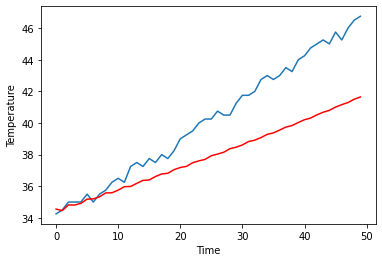

In [ ]:
plt.plot(unhealthy["TEMP"])
plt.plot(predictions,color='red')
plt.xlabel("Time")
plt.ylabel("Temperature")